In [1]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/SUMIT/Assignments/Projects/Black_Friday-Project--1-/Black_Friday Project/blackFriday_train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Here we have spot null values (NaN) only in Product_Category_2 and Product_Category_3 features. 

In [5]:
df.shape

(550068, 12)

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
#seperate numerical and categorical features

num_features= df.select_dtypes(include=["number"])
num_features.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
cate_features = df.select_dtypes(include=["object"])
cate_features.columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [9]:
# calculating how many (in % )null value in Product_Category_2 and Product_Category_3 feature

null_prcnt = (df["Product_Category_2"].isnull().sum()*100/len(df["Product_Category_2"].index))
print(f"Product_Category_2 null percentage:{round(null_prcnt,1)}%")

null_prcnt_2 = (df["Product_Category_3"].isnull().sum()*100/len(df["Product_Category_3"].index))
print(f"Product_Category_3 null percentage:{round(null_prcnt_2,1)}%")

Product_Category_2 null percentage:31.6%
Product_Category_3 null percentage:69.7%


the amount of null values in the variables, features contain null values of approximately 32% and 70% respectively. Product_Category_3 has much null values.

In [10]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [11]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

As a result of some product IDs don't have particular product categories or some customers chose not to buy certain categories of some product IDs. Therefore, it will be right to say there are some product IDs that don't have certain product categories or some customer chose not to buy certain product categories of product IDs. Since the whole idea centers on "no", so let's replace the null values with 0.

In [12]:
# replacing NaN values with 0

df.fillna(value=0, inplace = True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [13]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
categorical = df.select_dtypes(include=["object"])
print(categorical.columns)

numerical= df.select_dtypes(include=["number"])
print(numerical.columns)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')
Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


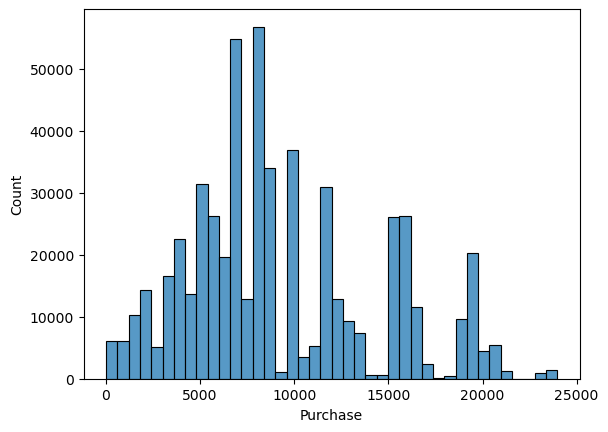

In [16]:
# Data Visualization

sns.histplot(df.Purchase, bins=40)
plt.show()

The highest purchase amount is between 5000 and 10000

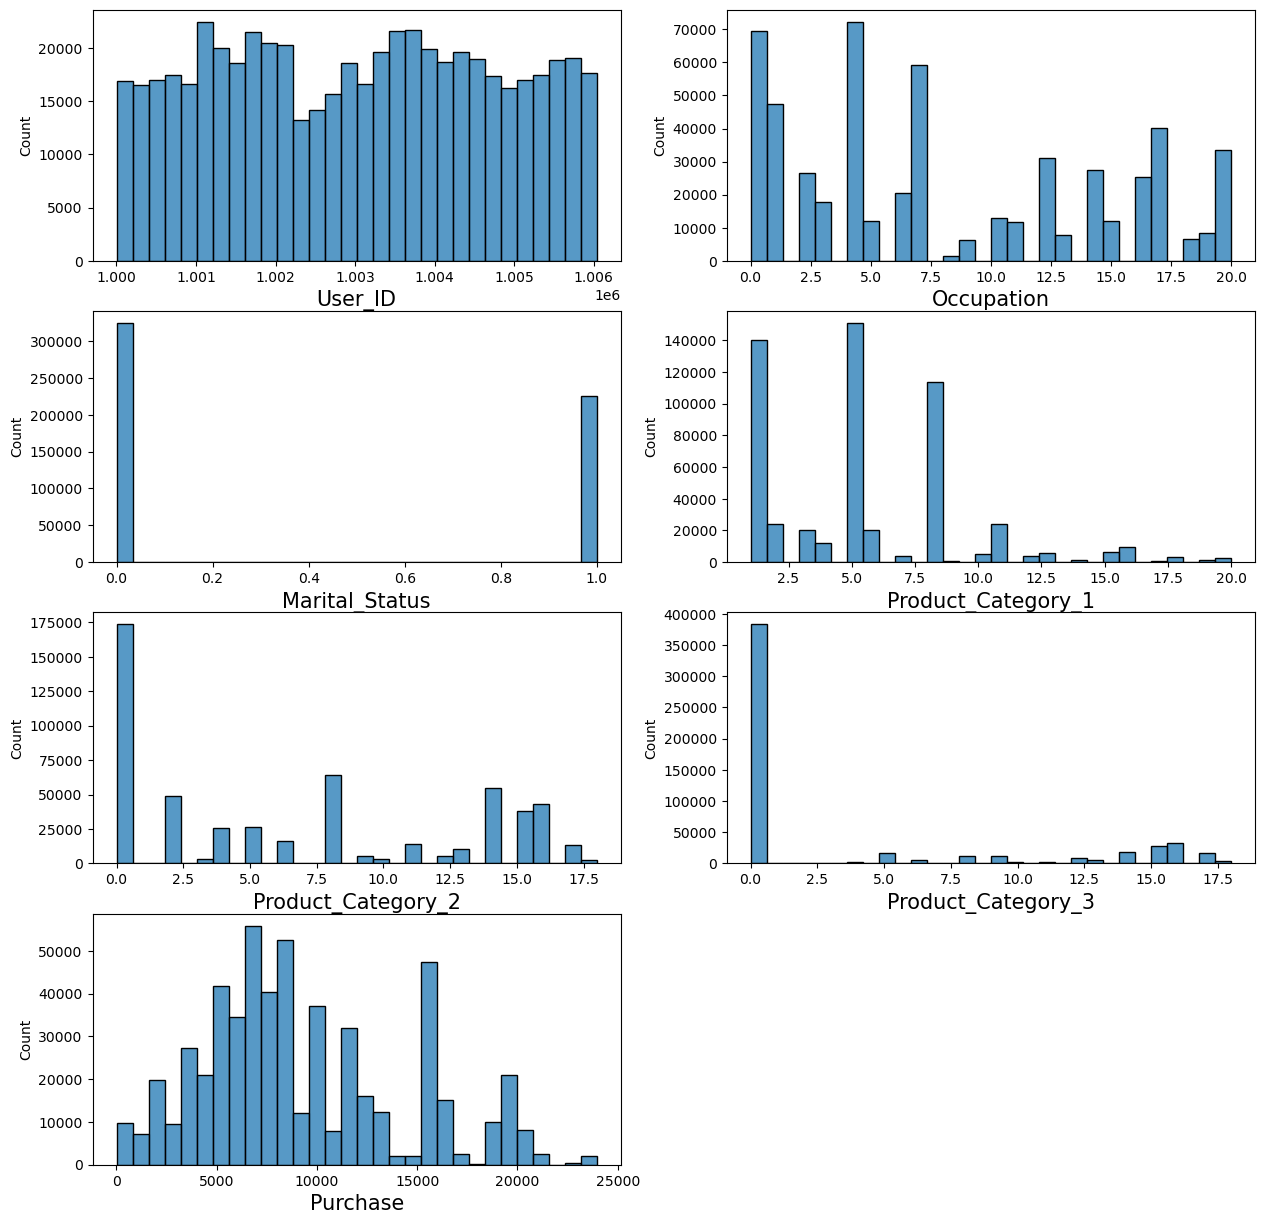

In [21]:
plt.figure(figsize=(15,15))
plotnumber =1

for column in numerical:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.histplot(numerical[column], bins= 30)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

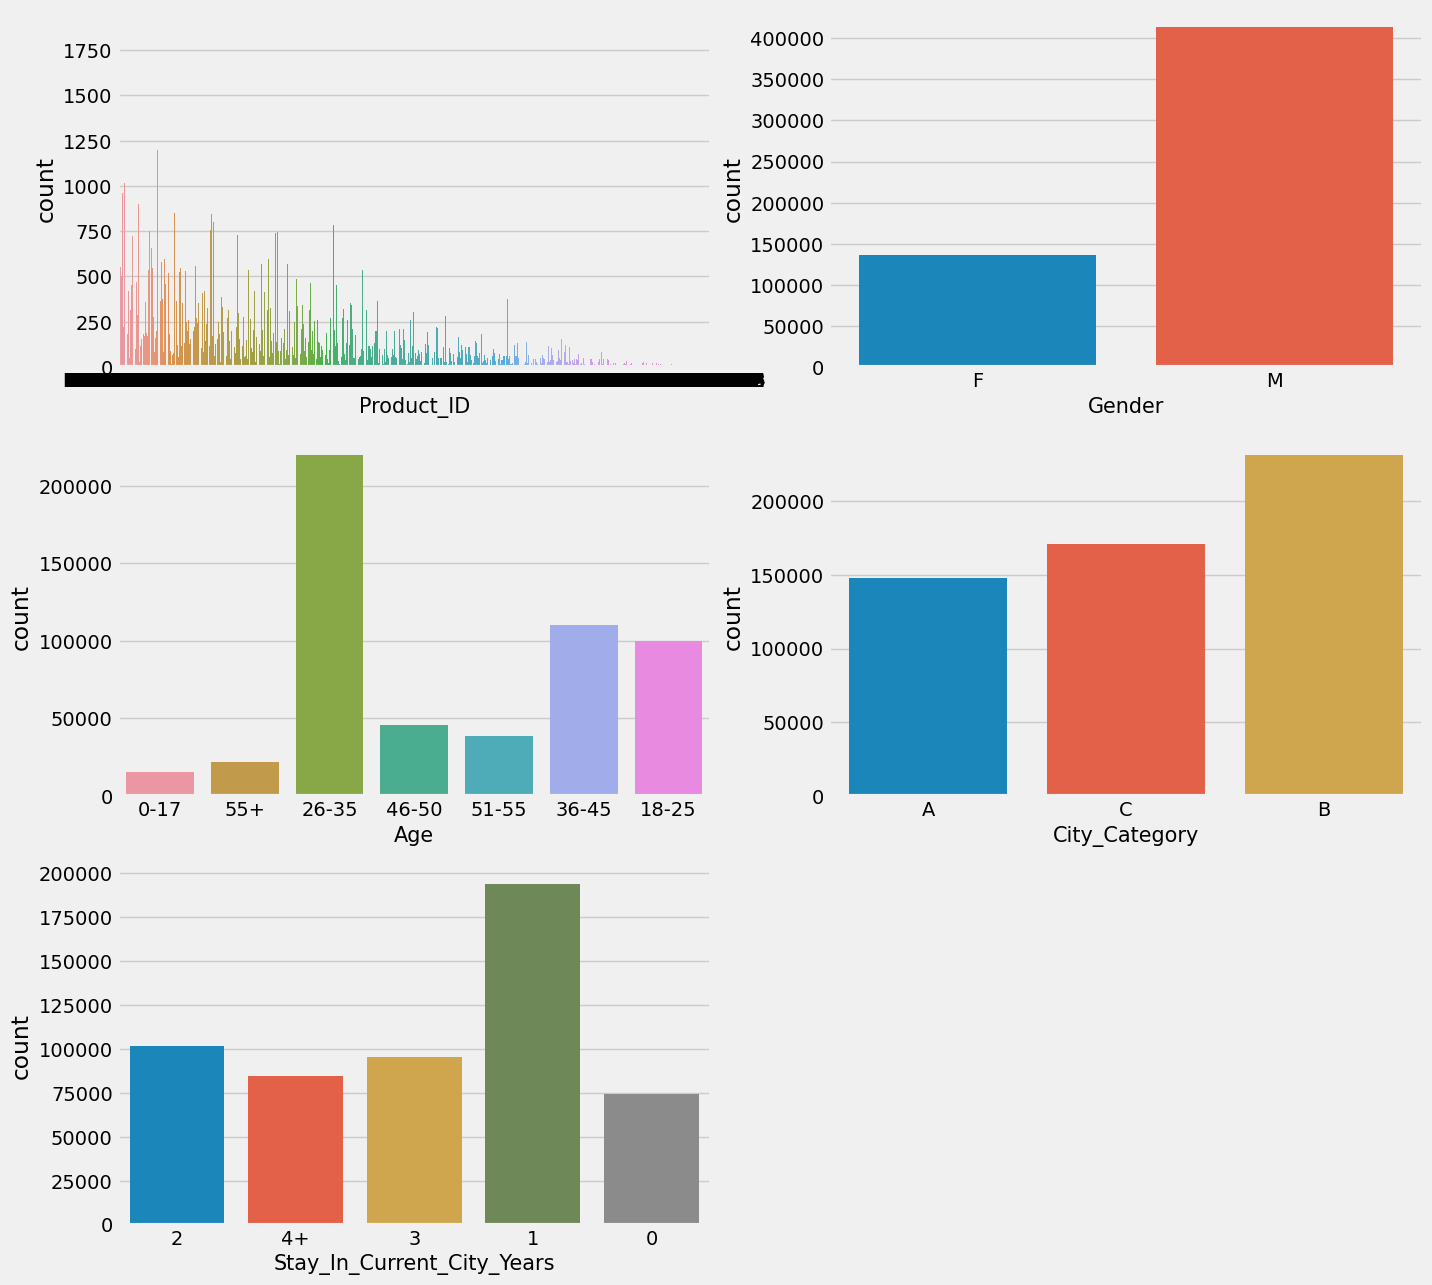

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plotnumber =1

for column in categorical:
    if plotnumber<=8:
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(categorical[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In Gender, the customers that made higher number of purchase are mostly males.  

In Age, customers of age range 26-35 made the highest number of purchase. The least are 0-17 and 55+.

In City_Category, customers living in city B made the highest number of purchase.

In Stay_in_Current_City_Years customers that have stayed in any of the cities for a year made the highest number of purchase.

In [ ]:
# lets see some relationship b/w features by visualizing

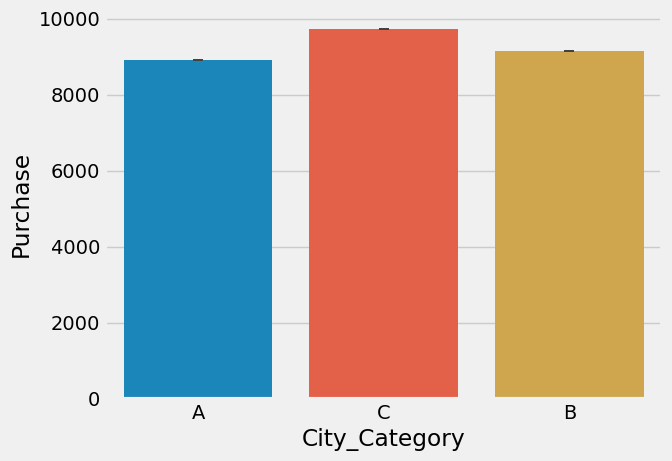

In [32]:
sns.barplot(x="City_Category", y="Purchase", data=df)
plt.show()

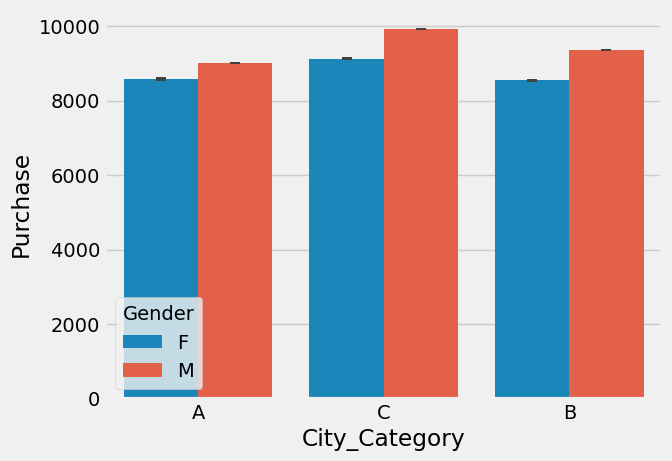

In [33]:
sns.barplot(x="City_Category", y="Purchase", hue="Gender", data=df)
plt.show()

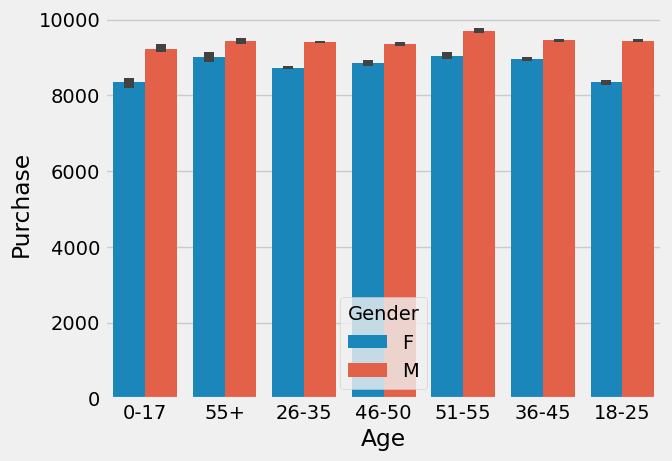

In [34]:
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)
plt.show()

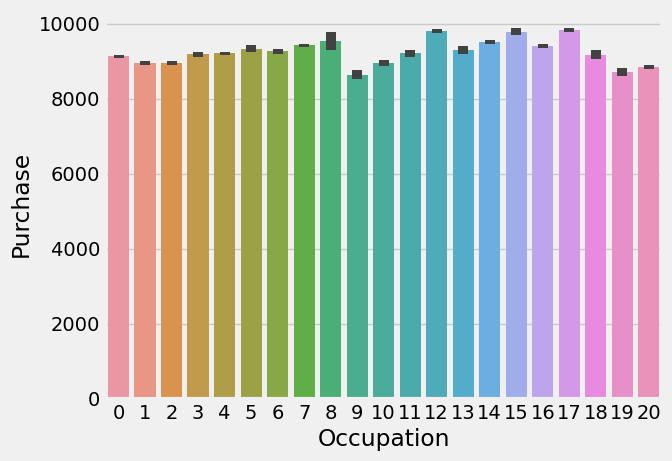

In [38]:
sns.barplot(x="Occupation", y="Purchase", data=df)
plt.show()

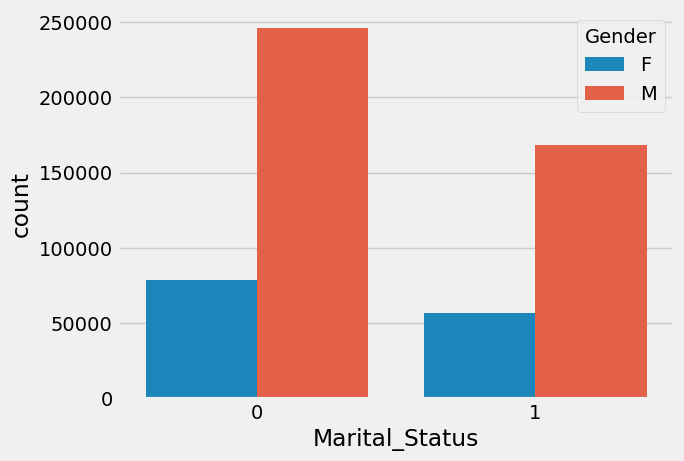

In [35]:
sns.countplot(x='Marital_Status',hue='Gender', data=df)
plt.show()

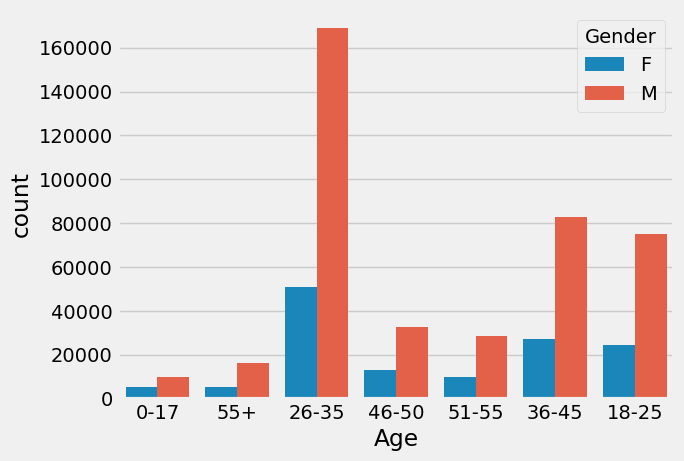

In [36]:
sns.countplot(x='Age',hue='Gender', data=df)
plt.show()

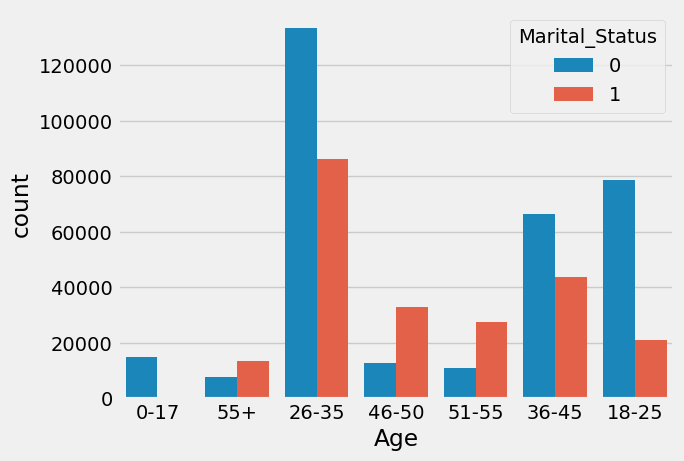

In [37]:
sns.countplot(x=df['Age'],hue=df['Marital_Status'])
plt.show()

In [30]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [39]:
#encoding values

gender_dict = { 'F':0, 'M':1}
df['Gender']= df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969


In [40]:
# label encoding on categorical features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Age','City_Category', 'Stay_In_Current_City_Years']:
    df[col] = le.fit_transform(df[col])

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


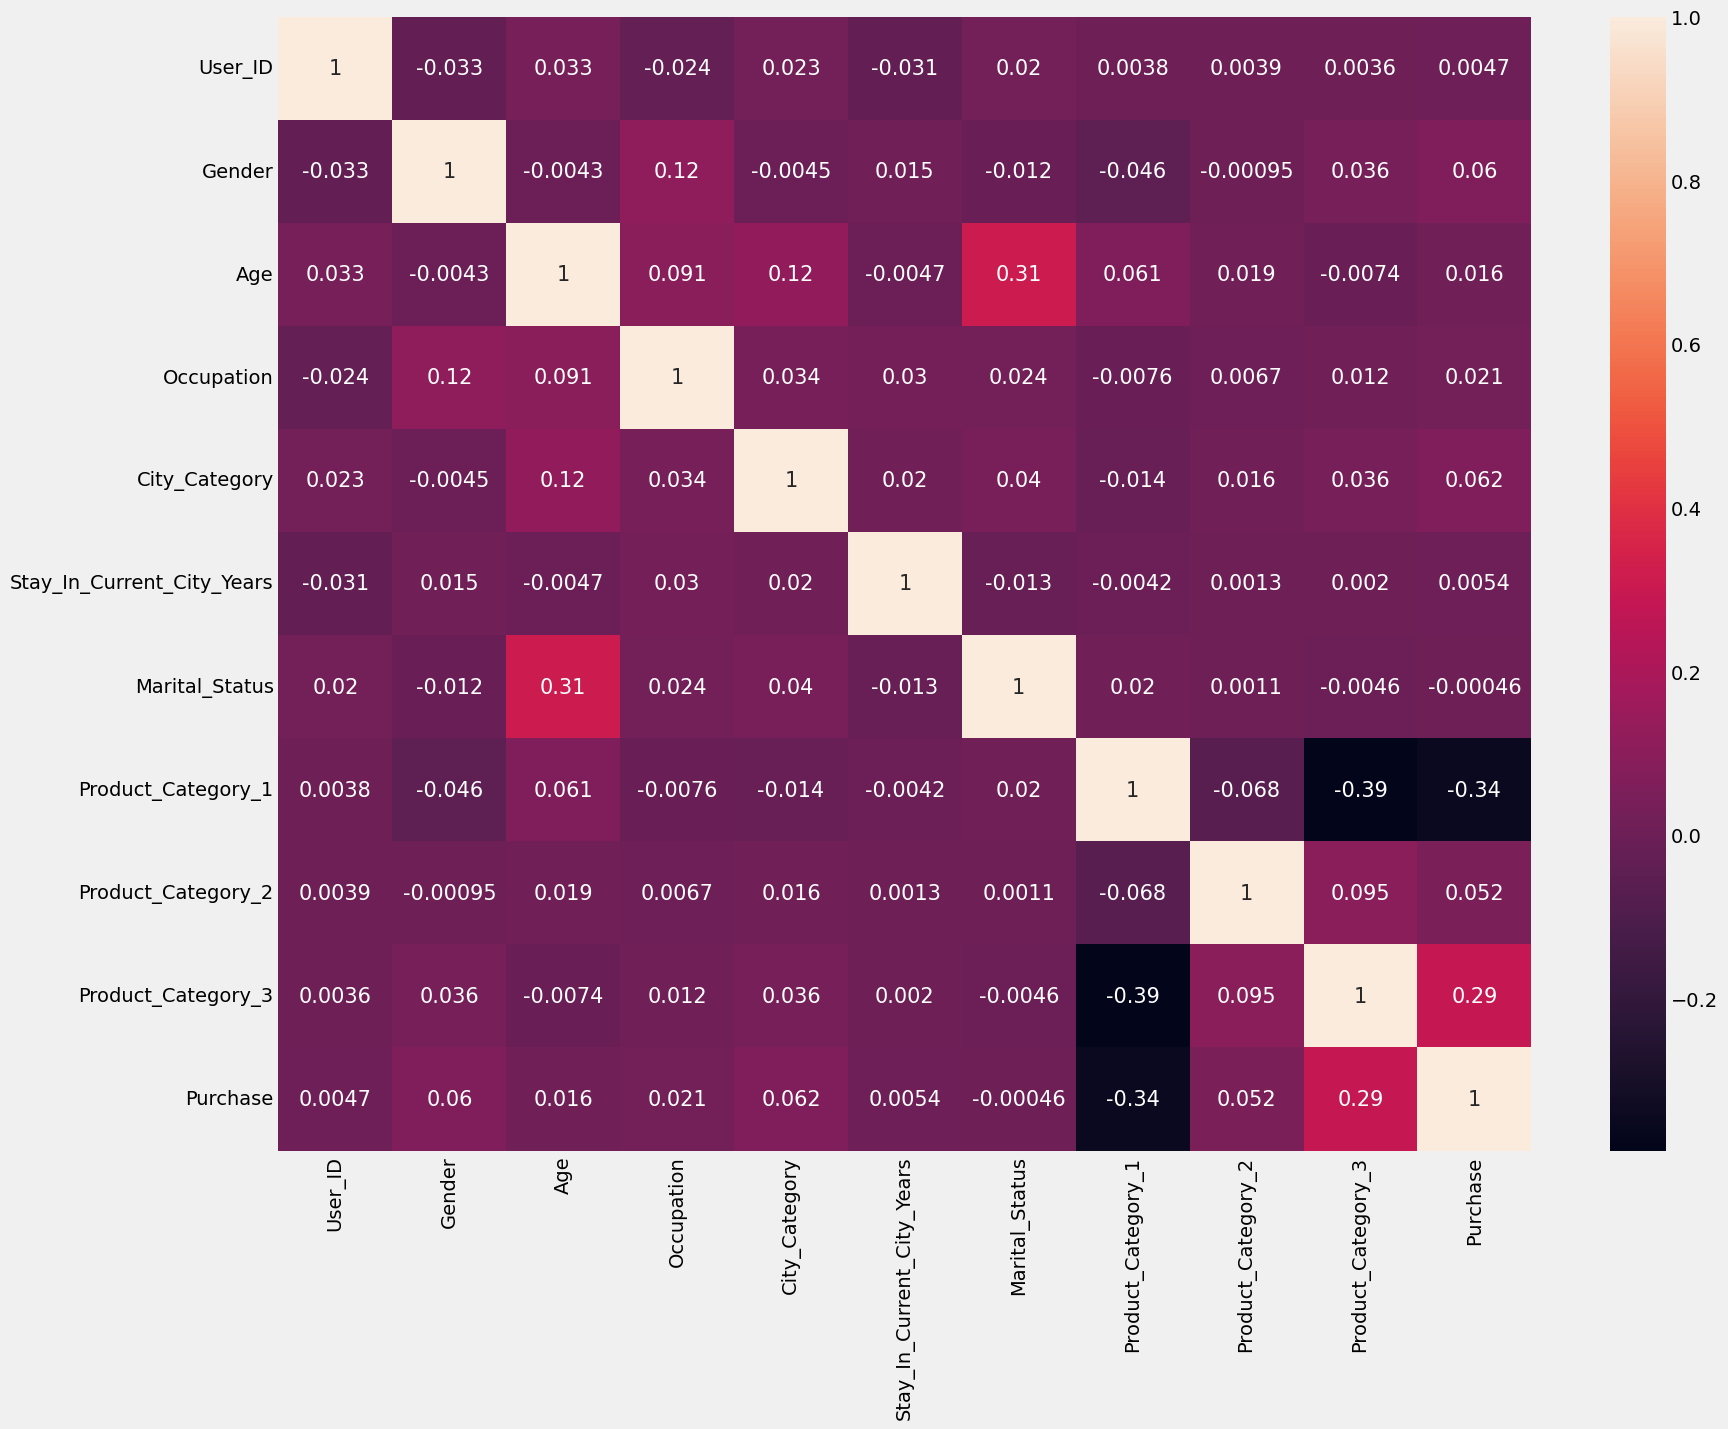

In [41]:
# plotting Heatmap correlation

df_cor= df.corr() # checking relationship

plt.figure(figsize=(18,14))
sns.heatmap(df_cor, annot=True, annot_kws={'size':15})
plt.show()

Here we see that Purchase feature have some correlation with Product_Category_1 and Product_Category_3.
And Product_Category_1 relationship with Product_Category_3, apart from that we have positive relatioship between Marital_status and Age.